## Assignment for EE4212 AY2024/2025 Semester 2
## Exploring Edge and Corner Detection from Ultra-dark Images

### BackgroundDS
While understanding of vision information through computer vision techniques has been developed (and is still developing) over the past decades, current techniques may not be applied directly to real-world applications due to various constraints. One of the concerns is that current techniques are mainly developed assuming the input data are shot under a non-challenging environment, with adequate illumination and contrast. This leads to the observable fragility of current techniques, which may not be capable of generalizing well to adverse environments, including dark environments with low illumination. Take security surveillance as an example: obtaining crucial visual information such as edges and corners could play a vital role in detecting objects for anomaly detection. However, anomalies are more common at nighttime and in dark environments, yet current computer vision approaches are largely obscured by darkness and are unable to extract key visual information effectively. It is therefore highly desirable to explore how we could obtain visual information given the current computer vision approaches in ultra-dark images captured from nighttime videos.

### Requirements
In this assignment, you are to complete several tasks that explores ways to obtain edges and corners from ultra-dark images. Each of you are assigned a unique ultra-dark video to work on. Please go to Canvas and select the "People" tab. Then filter the list to show "Students" only. If you are listed alphabetically as the **X-th** student, you will work on"**Dark Video (X)**".

Before doing the project, please read the instructions carefully (failure to do so will be penalized):

1. Implement your codes with the code block in jupyter notebook, you may add in however much code blocks you require. TODO code blocks are added as placeholders. **DO NOT** modify the instructional markdown blocks;
2. Make sure your codes **clean**, **easily readable** (add meaningful comments if needed, comments are **markable**), and **runnable**;
3. Write your answers in the given markdown cells (with [**Fill in xxxx**]), keep your answers clear and concise;
4. Your submission should be the exported PDF file of your jupyter notebook. It is easier for you to **"Export to HTML"** first, then **Print to PDF**. Please print your PDF strictly in **Portrait** mode. Name your PDF file strictly to **"MATRICULATION NUMBER_YOUR NAME_CA1.pdf"**
5. Incorrect submission format will result in a **direct** 10 points (out of 100) deduction.
6. Submit your project PDF on [Canvas](https://canvas.nus.edu.sg/) before the deadline: **5:59 pm (SGT), 28 February, 2025**; 
7. Policy on late submission: the deadline is a strict one, any late submission will be deducted 10 points (out of 100) for every 24 hours.
8. Make sure that the **submitted notebooks have been run** and the **cell outputs are visible**.
9. This is an individual project, do **NOT** share your solutions with others, we have zero tolerance for **plagiarism**.

### Basic Information Collection
- Student Name: [**John Ashwin Letchmanan**]
- Student ID: [**A0233403W**]
- Video ID: [**7**]

### Task 1: Implementing edge and corner detections without the corresponding OpenCV function (30%)
In this task, you would first try to implement the Canny edge detection (15%) and Harris corner detector detection (15%). You may use any function of OpenCV or its equivalence for basic operations (e.g., loading images, matrix computation, etc.), but **strictly NOT** the direct functions (i.e. cv2.Canny and cv2.cornerHarris). Your input images are [Reference Image 1](https://canvas.nus.edu.sg/files/5820164/download?download_frd=1) and [Reference Image 2](https://canvas.nus.edu.sg/files/5820163/download?download_frd=1). 

#### Requirements for Task 1
1. Add comments to show the individual processes.
2. Show the output of key steps (e.g., after image smoothing, after computing partial derivatives, after applying threshold, etc.).

Note: Points will only be given if the comments for explaining the edge and corner detection processes (especially those discussed in class) are sufficient, and the output of all key steps discussed in class are given.

In [191]:
#imports and variables
import cv2
import numpy as np
import matplotlib.pyplot as plt

image1 = "Ref_1.jpg"
image2 = "Ref_2.jpg"

In [192]:
#understanding the image
img1 = cv2.imread(image1)
img2 = cv2.imread(image2)
# cv2.imshow('image', img1)
# cv2.imshow('image1', img2)
print(img1.shape)
print(img2.shape)
# print(img)
cv2.waitKey(0)

(533, 800, 3)
(600, 600, 3)


-1

In [193]:
#plotting the image function for answering the question
def show_image(title, image):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.show()
    

In [194]:
#############################################################################
##                                                                         ##
##           TODO: CODE BLOCK FOR CANNY IS HERE                            ##
#############################################################################
def canny_edge_detection(image,stand_deviation= 0, low_threshold=50, high_threshold=150, checker = False):
    # (1) Convert image to grayscale
    gray = cv2.imread(image, cv2.IMREAD_GRAYSCALE) # read image as grayscale since edge detection doesn't need color information
    
    # (2) Apply Gaussian Smoothing to the image to reduce noise and smoothen the image
    # - This is done by convolving the image with a Gaussian kernel
    blurred = cv2.GaussianBlur(gray, (5, 5), stand_deviation) # kernel size (5, 5) and 0 so that the standard deviation is calculated based on the information in the kernel

    # (3) Find the intensity gradients of the image since edges are at the regions of high intensity 
    # Using the sobel operator as it can approximate the partial derivative, Ix and Iy
    Ix = cv2.Sobel(blurred,cv2.CV_64F, 1, 0,3) # Note that cv2.CV_64F is required to rtain the negative values else it will be clipped to 0 as it in originally in uint8 format (0-255)
    Iy = cv2.Sobel(blurred,cv2.CV_64F, 0, 1,3) # 3 is the kernel size
    # print(Ix)

    # (4) Combine Ix and Iy to get the gradient magnitude, this combines the edges in both directions to get the full edge strength
    gradient_magnitude = np.sqrt(Ix**2 + Iy**2) 

    # # (5) Find the direction of the gradient which is needed for non-maximum suppression
    gradient_dir = np.arctan2(Iy, Iy) #this finds the angle of the gradient at each pixel with respect to its and x and y direc
    gradient_dir = gradient_dir * 180 / np.pi #convert to degrees
    gradient_dir = gradient_dir % 180 # as there are negative values, we will take the modulus of 180 to get the angle in the range of 0 to 180
    # print(gradient_dir)
    
    # (6) Non-maximum suppression- this is done to thin out the edges along the gradient direction 
    #https://justin-liang.com/tutorials/canny/#suppression ,, using this we will interpolate the angle for better accuracy
    suppressed = np.zeros(gradient_magnitude.shape) #create an new 0 array and store the values with maximum edge strength 
    for i in range(1, gradient_magnitude.shape[0]-1):
        for j in range(1, gradient_magnitude.shape[1]-1):
            neighbour1 = 255
            neighbour2 = 255
            #create neighbours to compare the edge strength
            if (0 <= gradient_dir[i,j] < 22.5) or (157.5 <= gradient_dir[i,j] <= 180): #horizontally
                neighbour1 = gradient_magnitude[i, j+1] #right dir
                neighbour2 = gradient_magnitude[i, j-1] #left dir
            
            elif (22.5 <= gradient_dir[i,j] < 67.5): #diagonally
                neighbour1 = gradient_magnitude[i-1, j+1] #top right dir
                neighbour2 = gradient_magnitude[i+1, j-1] #bottom left dir
            
            elif (67.5 <= gradient_dir[i,j] < 112.5): #vertically
                neighbour1 = gradient_magnitude[i-1, j] #top 
                neighbour2 = gradient_magnitude[i+1, j] #btm
                
            elif (112.5 <= gradient_dir[i,j] < 157.5): #diagonally
                neighbour1 = gradient_magnitude[i-1, j-1] #top left 
                neighbour2 = gradient_magnitude[i+1, j+1] #bottom right 
            
            #compare the edge strength of the current pixel with the neighbours
            if (gradient_magnitude[i,j] >= neighbour1) and (gradient_magnitude[i,j] >= neighbour2):
                suppressed[i,j] = gradient_magnitude[i,j]

    # (7) Apply double thresholding to determine potential edges, will use two thresholds, a high and low threshold to determine strong and weak edges
    low = 50 #value for weak edges, do not set to 0 as it will be used for edge tracking
    high = 255 #value for strong edges
    strong_edges = np.where(suppressed > high_threshold) #strong edges are the ones above the high threshold
    weak_edges = np.where((suppressed >= low_threshold) & (suppressed <= high_threshold)) #weak edges are the ones between the high and low threshold
    dbl_threshold = np.zeros(suppressed.shape)
    dbl_threshold[strong_edges] = high
    dbl_threshold[weak_edges] = low
    
    if checker:
        show_image("Grayscale Image", gray)
        show_image("Blurred Image", blurred)
        show_image("Intensity Gradient in X direction", np.abs(Ix)) #since the values can be negative, we will take the absolute value
        show_image("Intensity Gradient in Y direction", np.abs(Iy)) 
        show_image("Intensity Gradient Magnitude", gradient_magnitude) 
        show_image("Suppressed Image", suppressed)
        show_image("Double Thresholding", dbl_threshold)
        
    # (8) Apply edge tracking by hysteresis to track the edges by suppressing weak edges that are not connected to strong edges
    #loop thru image except the borders 
    for i in range(1, dbl_threshold.shape[0]-1): 
        for j in range(1, dbl_threshold.shape[1]-1):
            if dbl_threshold[i,j] == low: #check if the pixel is a weak edge
                if np.any(dbl_threshold[i-1:i+2, j-1:j+2] == high): #check if any of the neighbours are strong, if yes, turn the weak edge to strong
                    dbl_threshold[i,j] = high
                else:
                    dbl_threshold[i,j] = 0 #is there is no nearby strong edge, turn the weak edge to 0, essentially we remove the weak edge and keep only the strong edges
    show_image("Edge Tracking by Hysteresis", dbl_threshold)

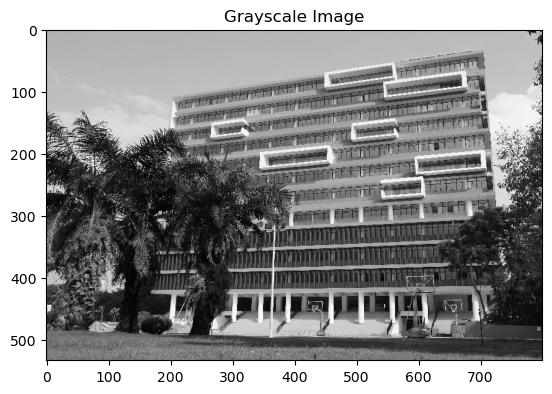

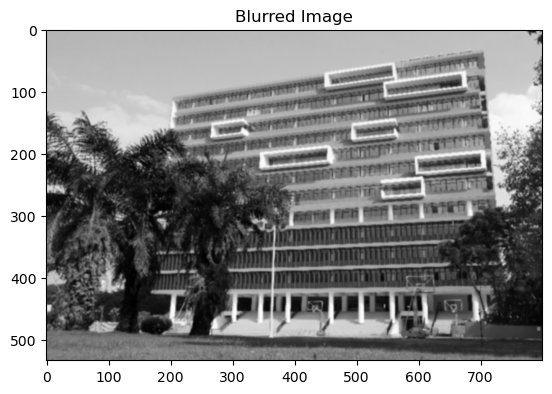

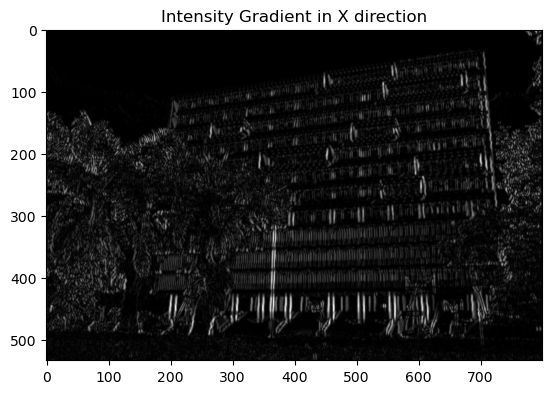

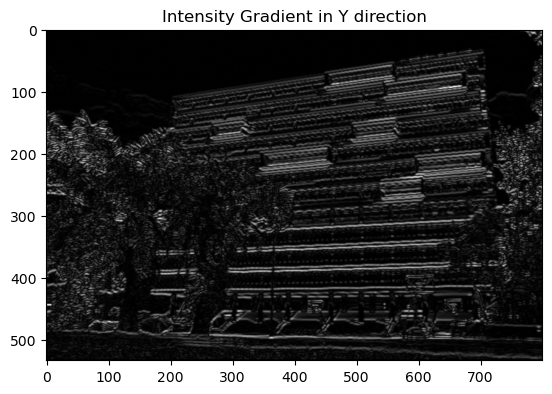

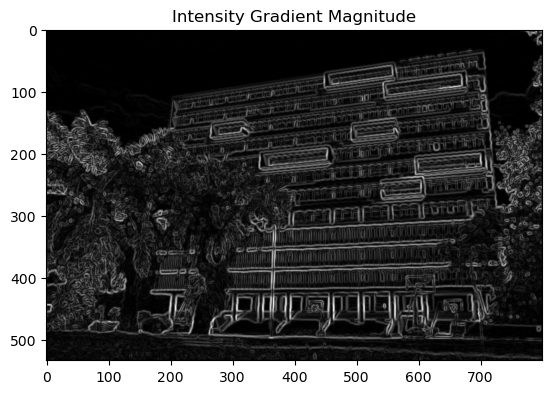

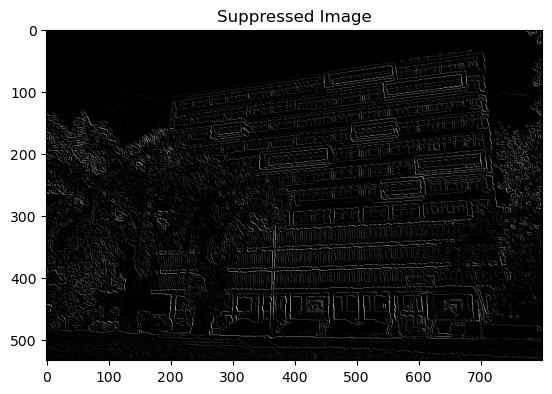

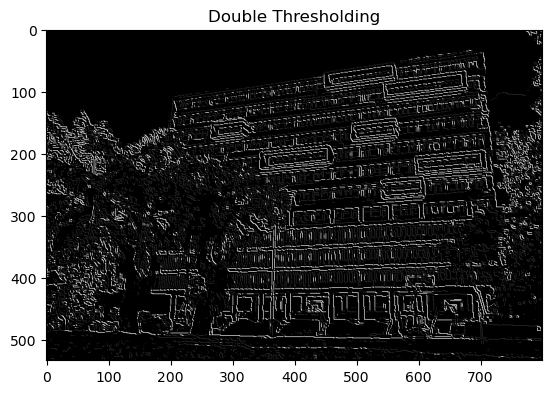

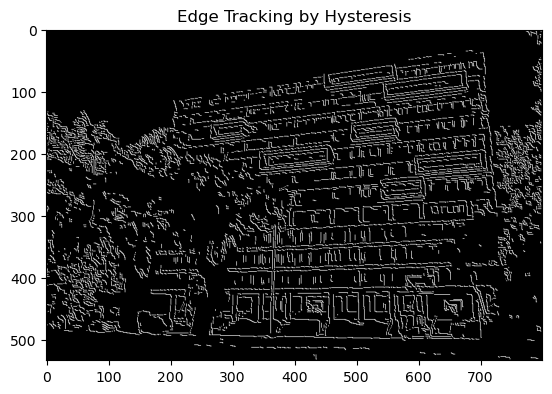

In [195]:
canny_edge_detection(image1, checker=True)

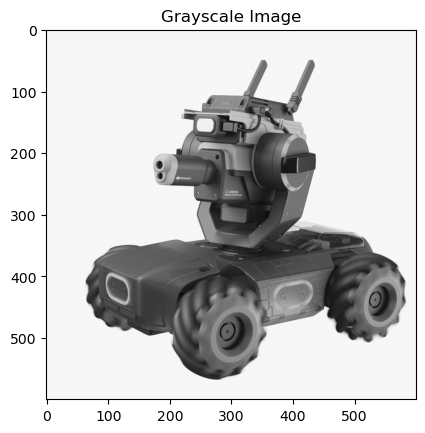

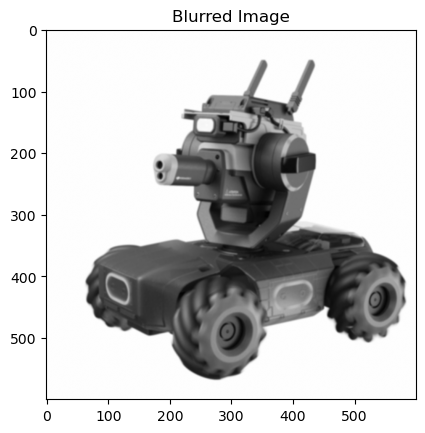

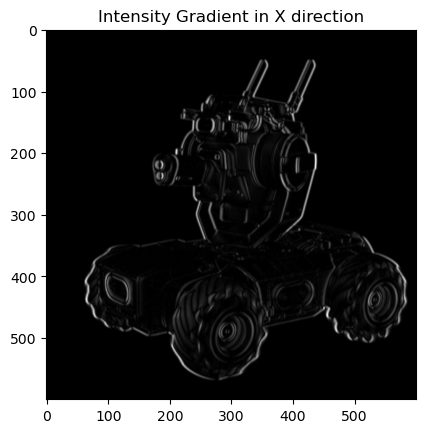

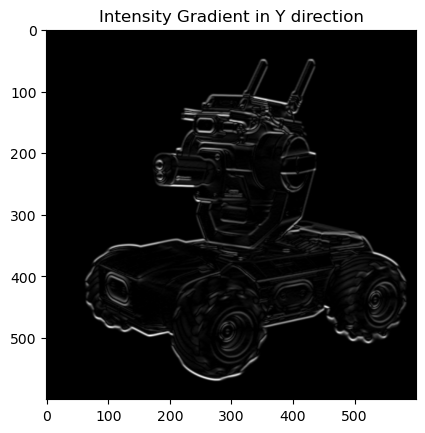

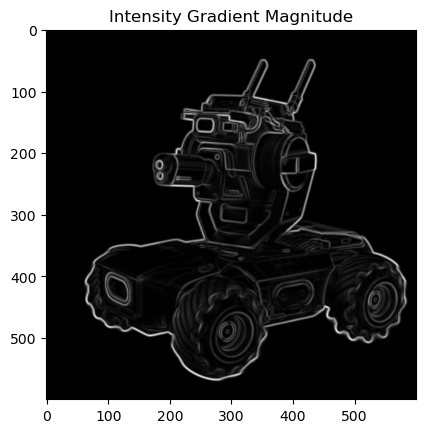

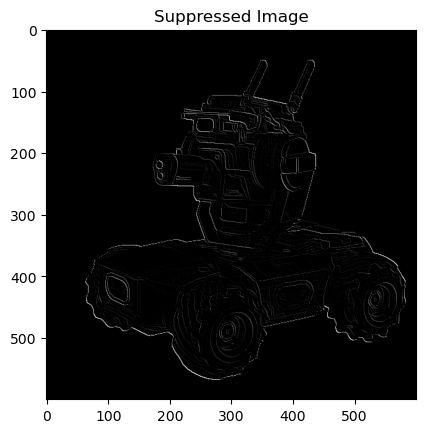

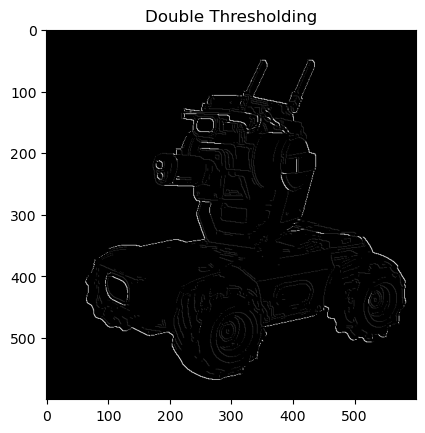

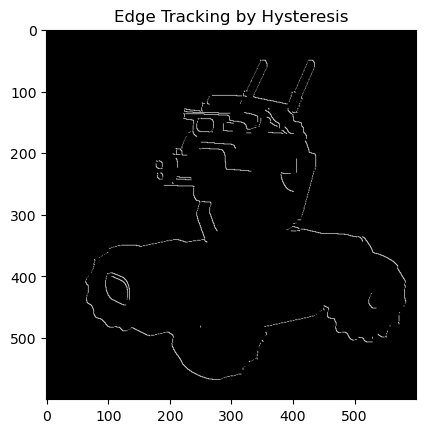

In [196]:
canny_edge_detection(image2,0, 50, 255,True)

In [197]:
#############################################################################
##                                                                         ##
##           TODO: CODE BLOCK FOR HARRIS IS HERE                           ##
#############################################################################
def harris_corner_detection(image,stand_deviation= 0, alpha=0.04, checker=False):
    """
    Harris Corner Detection without using cv2.cornerHarris()
    """
    # (1) Convert to grayscale
    gray = cv2.imread(image, cv2.IMREAD_GRAYSCALE) #same as canny, we will convert the image to grayscale

    
    # (2) Apply Gaussian Smoothing to the image to reduce noise and smoothen the image
    Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in X direction #same as canny, we will compute intensity gradient in the x direction
    Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in Y direction #same as canny, we will compute intensity gradient in the y direction


    # (4) Compute products of intensity derivatives in order to compute M(second moment matrix)
    #note that Ixx represents A and Iyy repreentst C and Ixy represents B in the second moment matrix
    Ixx = Ix**2 # The product of the gradient in the x direction
    Iyy = Iy**2 # The product of the gradient in the y direction
    Ixy = Ix * Iy # The product of the gradient in the x and y direction
    

    # (5) Apply Gaussian filter to the products of intensity derivatives
    # we will apply gaussian filter only after computing the derivatives
    # This is because unlike in cannny where we blur to noise to find edges, here we need to find the changes first since corners are regions of high change.
    Iyy = cv2.GaussianBlur(Iyy, (3, 3), stand_deviation)
    Ixx = cv2.GaussianBlur(Ixx, (3, 3), stand_deviation)
    Ixy = cv2.GaussianBlur(Ixy, (3, 3), stand_deviation)

    # (6) Compute Harris response matrix R which will inform us if a pixel is a corner, edege or flat region
    determinant = (Ixx * Iyy) # - (Ixy**2) -> det = AC - B^2 but since B is Ixy, we assume ixy =0 so we only account for horizontal and vertical gradients
    trace = Ixx + Iyy # trace = A + C
    R = determinant - alpha * (trace**2) # 𝑅 = det(𝑴) − 𝛼 trace -> Harris Response matrix

    # (7) Using the Harris response matrix, apply the threshold to get original image to get the corner points
    threshold = 0.01 * R.max()  # Set threshold as 10% of max response
    # print(threshold)
    # print(R)
    corners = np.zeros(R.shape)
    corners[R > threshold] = 255  # Mark strong corner points


    # (8) Apply Non-Maximum Suppression (NMS), find local maxima in 3x3 winder using R matrix
    # - also suppress the corners that are not the maximum in the local window
    nms_corners = np.zeros(R.shape)
    img = cv2.imread(image)
    for i in range(1, corners.shape[0] - 1):
        for j in range(1, corners.shape[1] - 1):
            if corners[i, j] == 255:  # Check if it is a strong corner
                window = R[i - 1:i + 2, j - 1:j + 2]  # 3x3 window with corner[i,j] as center
                if R[i, j] == np.max(window):
                    nms_corners[i, j] = 255 # Mark the corner with white color
                    img[i, j] = [255, 0, 0]  # Mark the corner with red color
                else:
                    nms_corners[i, j] = 0 # Suppress the corner if it is not the maximum in the window
                    
    # for plotting the image
    if checker:
        show_image("Grayscale Image", gray)
        show_image("Intensity Gradient in X direction", np.abs(Ix))
        show_image("Intensity Gradient in Y direction", np.abs(Iy))
        show_image("Harrris Response Matrix", R)
        show_image("Harris Corner Detection", corners)
    
    show_image("Harris Corner Detection with NMS", nms_corners)
    show_image("Image with Harris Corners", img)


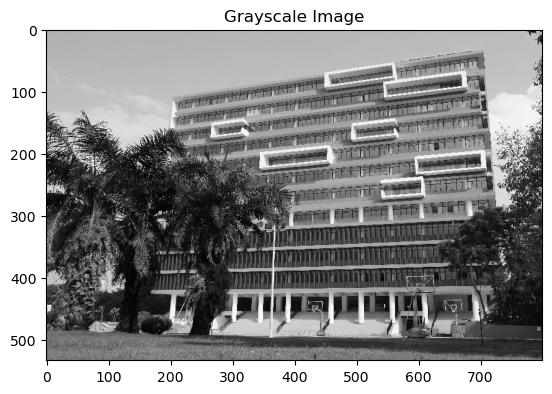

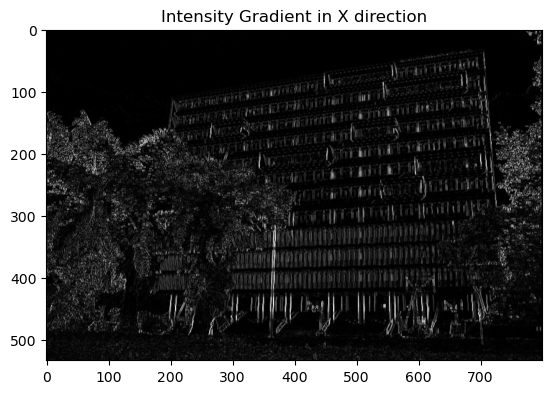

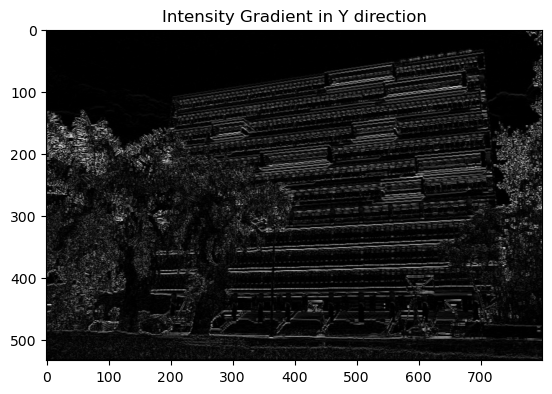

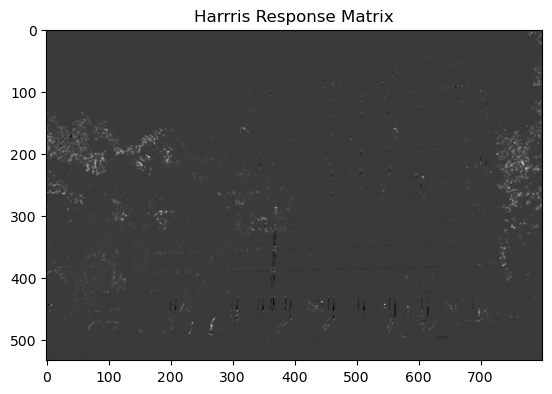

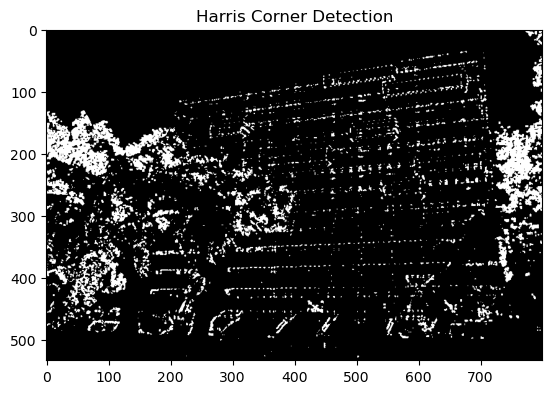

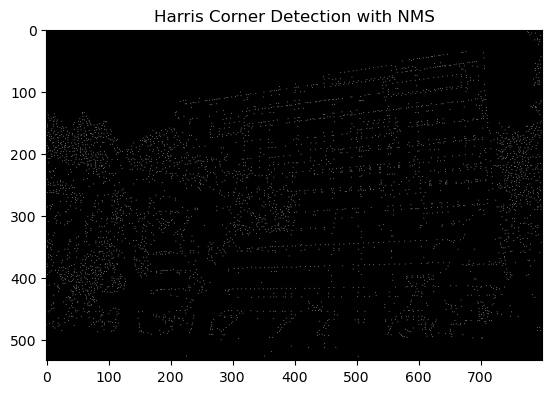

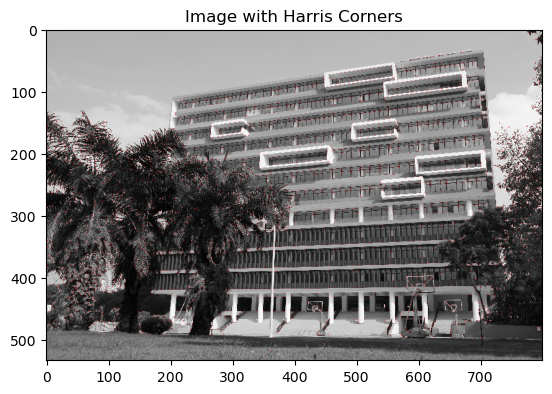

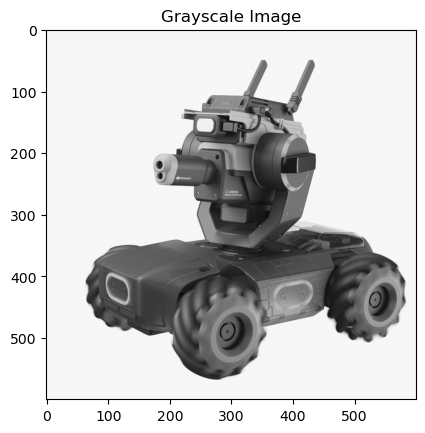

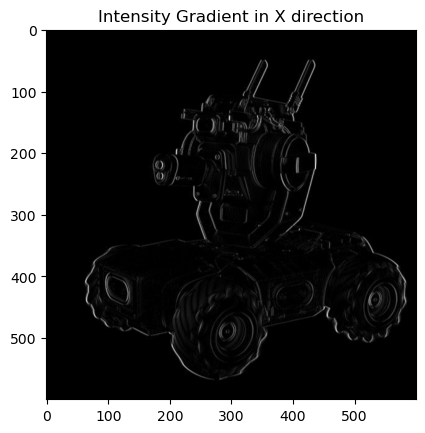

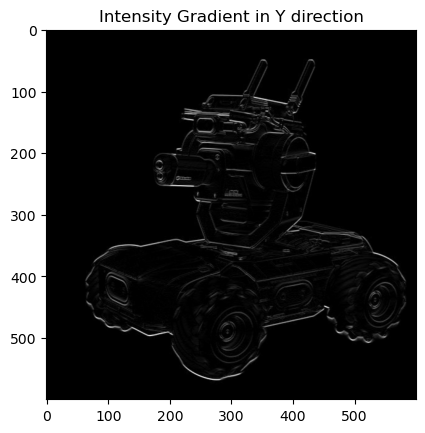

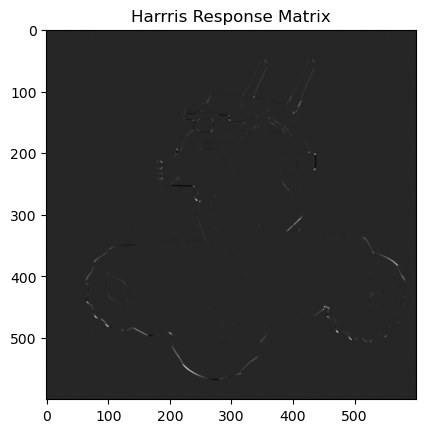

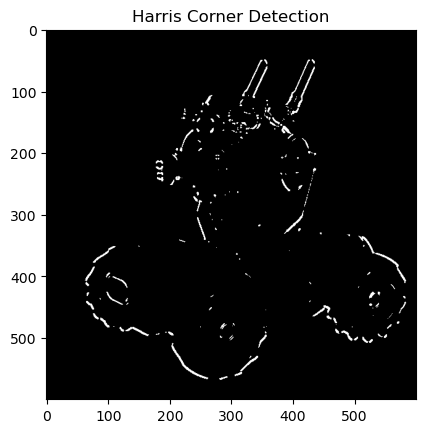

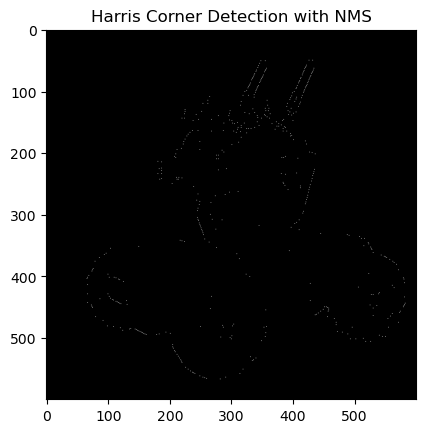

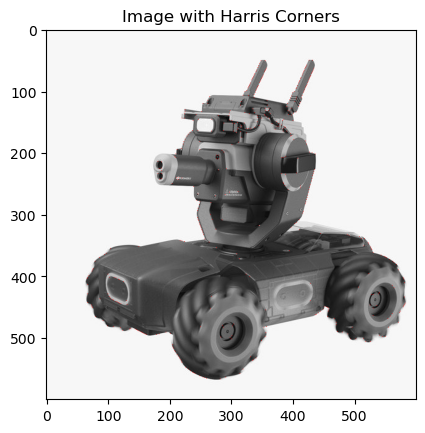

In [198]:
harris_corner_detection(image1, checker=True)
harris_corner_detection(image2, checker=True)

### Task 2: Canny edge detection in ultra-dark images (45%)
In this task, you will need to implement the Canny edge detection algorithm and try to improve its performance with image enhancement methods. You are to discuss how the low illumination and contrast of ultra-dark images affect the performance of Canny edge detection, and how different image enhancement methods would improve/affect the performance of Canny edge detection on ultra-dark images. You are recommended to follow the following steps (requirements):

#### Steps/Requirements for Task 2:
1. Sample at least 3 images from the given input video "**Dark Video (X).mp4**". Output the sampled images (you could sample with the OpenCV function or directly screenshot, do be careful not to screenshot areas irrelevant to the dark video). Compute the image histograms of the sampled images and discuss your observations. You may convert the RGB images into grayscale for your convenience. (5%)
2. Apply your implementation of Canny edge detection onto your sampled images. You do not need to show the output of each key step of Canny edge detection. But, you must show the final output of your implementation of Canny edge detection onto your sampled images. Observe the performance of Canny edge detection on the sampled images and discuss your observation. (5%)
3. Implement **histogram equalization (HE)** to your sampled images. The implementation of HE must be readable with **appropriate comments**. Output the results of HE (denote as HE-enhanced sample images) and discuss your observation: how HE change/improve the sampled images. Hypothesize how will the output of Canny edge detection be like after implementing HE onto your sampled images. (10%)
4. Apply your implementation of Canny edge detection onto your HE-enhanced sampled images and demonstrate the final output. Do the final outputs fit your hypothesis? If yes, rationalize your hypothsis. If not, describe and explain the differences. (10%)
5. Lastly, choose a image enhancement method you prefer. **State** what image enhancement method has been chosen. Implement it with **appropriate comments** and output the results (denote as Self-enhanced sample images). Apply Canny edge detection onto the self-enhanced sample images and display the results. Discuss the differences between the Self-enhanced sample images against the HE-enhanced sample images. Further, discuss the difference between the edge detected with Canny edge detection applied over the Self-enhanced sample images and the HE-enhanced sample images. (15%)

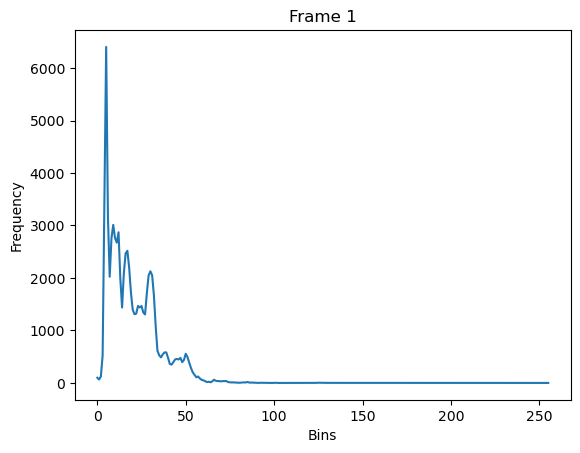

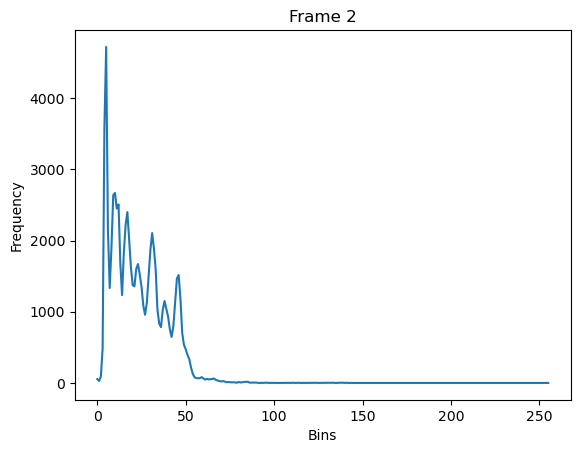

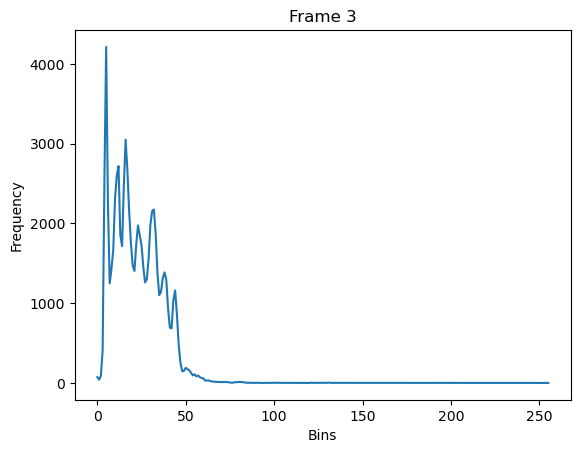

In [208]:
#############################################################################
##                                                                         ##
##           TODO: CODE BLOCK FOR STEP 1 IS HERE                           ##
#############################################################################
#creating sampled images
vid = cv2.VideoCapture('Dark Video (7).mp4')
seconds = [0,1,2]
fps = vid.get(cv2.CAP_PROP_FPS)

for i, sec in enumerate(seconds): #loop thru the frames and index
    frame = sec * fps
    vid.set(cv2.CAP_PROP_POS_FRAMES, frame) #set the video to the frame
    ret, frame = vid.read() #read the frame
    if ret:
        cv2.imwrite(f"frame_{i}.jpg", frame) #save the frame
    # else:
    #     print(f"Frame {frame} not found")
vid.release()
#loop thru the frames
for i in range(3):
    gray = cv2.imread(f"frame_{i}.jpg", cv2.IMREAD_GRAYSCALE) #read the image as grayscale
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256]) #calculate the histogram of the image-> range from 0 to 256 and only 1 channel
    plt.figure(i)
    plt.title(f"Frame {i+1}")
    plt.plot(hist)
    plt.xlabel("Bins")
    plt.ylabel("Frequency")
    plt.show()
    

**As shown in the 3 frame's histogram, the pixel intensities are mostly concentrated at the lower end of the histogram. Hence, the left skewness of their historgram indicates that they are in the blacker regions on the grayscale spectrum. Therefore, with pixel values ranging mostly from 0-50, the image is dark or with little to no illuminiation. Furthermore, the historgrams all are clustered within the 0-50 range which indicates low contrast in the images.**
  


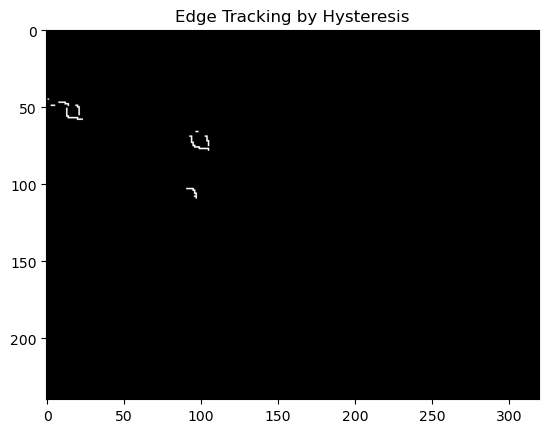

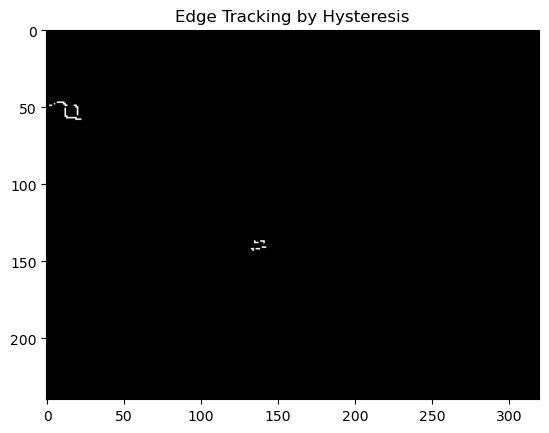

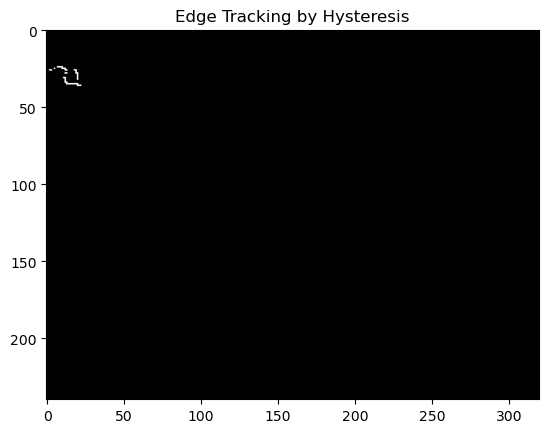

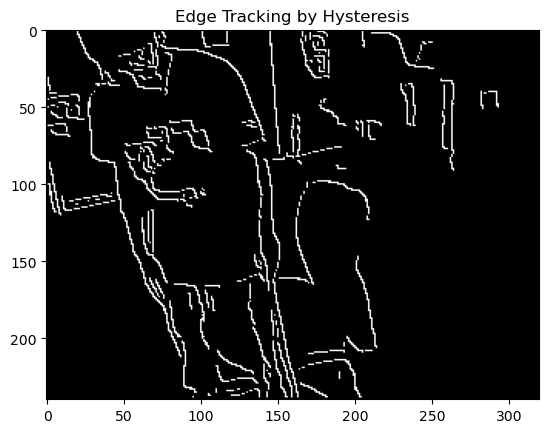

In [209]:
#############################################################################
##                                                                         ##
##           TODO: CODE BLOCK FOR STEP 2 IS HERE                           ##
#############################################################################
canny_edge_detection("frame_0.jpg")
canny_edge_detection("frame_1.jpg")
canny_edge_detection("frame_2.jpg")
canny_edge_detection("frame_0.jpg",0, 10,30)

**There are no distinct edges observed in this detection. All the 3 images did not output the expected edge detection which would be the human body. In fact, from the 3 images the common edge detected appears to be the socket which has light reflected on it. Due to poor illumination of the image, there is not enough intensity variation to generate clear gradients. Therefore, the detector is unable to otuput pronounced edges.Although, we can argue about playing around with the threshhold values to optain the better edge detection. It is important to understand that since it is a very dark image, all the pixel intensities clutter strongly within a range. As a result, this gives us lesser flexibility to play around with the threshold values which will result in either too many edges or no edges at all. For prove, I added a 4th example, where I played around with the threshold values. As mentioned, the edges detected are definitely more pronounced as the one with no the distinct edges but there is too many edges present and the threshold range is too small[0-10 & 30-50]. Hence, the Canny edge detection is not suitable for this image.**

C:\Users\johna\AppData\Local\Temp\ipykernel_20124\3587882989.py:39: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(image.flatten(), 256, [0,256], color='gray') #need to flatten the image to 1D array
C:\Users\johna\AppData\Local\Temp\ipykernel_20124\3587882989.py:49: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(hist_equalized_image.flatten(), 256, [0,256], color='gray')


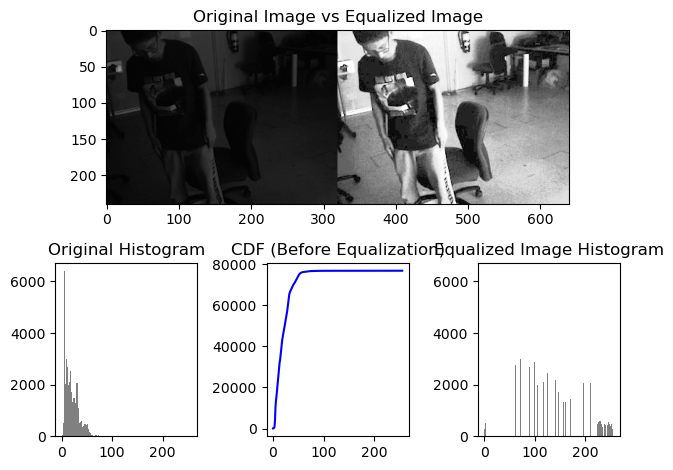

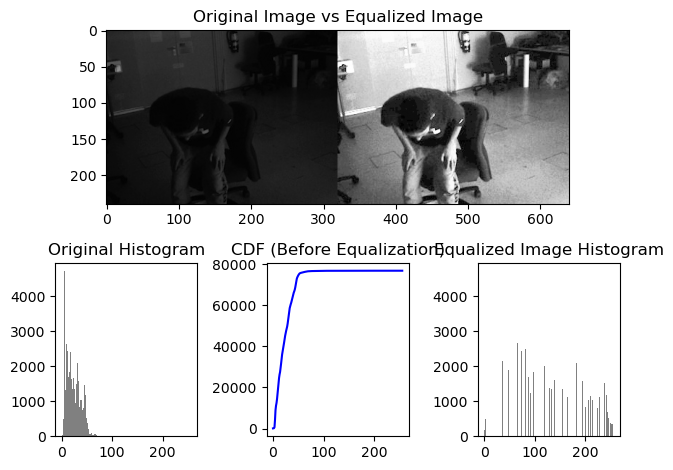

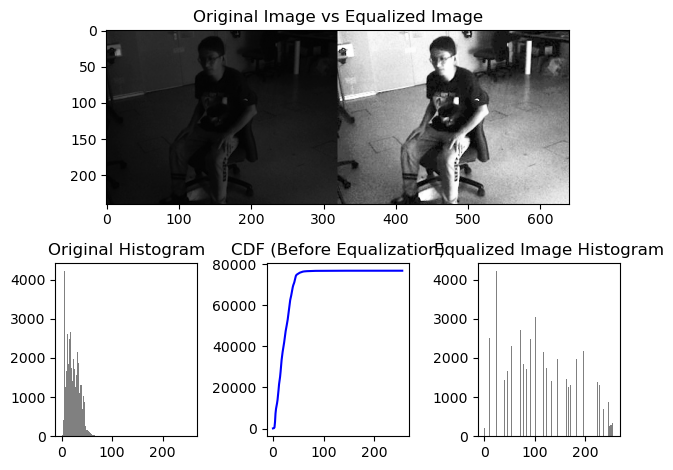

In [ ]:
#############################################################################
##                                                                         ##
##           TODO: CODE BLOCK FOR STEP 3 IS HERE                           ##
#############################################################################
def histogram_equalization(image_path, output_path, checker=False):
    # (1) Load the grayscale image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # (2) Compute the histogram of the iamge
    hist = cv2.calcHist([image], [0], None, [256], [0, 256]) # 0 is the channel, None is the mask, 256 is the number of bins, [0, 256] is the range

    # Compute the Cumulative Distribution Function (CDF) ## THIS DOES NOT ACCOUNT FOR 0 VALUES
    # cdf = hist.cumsum() # find cdf
    # cdf_normalized = cdf * (255 / cdf.max())  # this is the part where we spread the data over the entire range of 0 to 255 [(L-1)*(cdf-cdf.min())/(cdf.max()-cdf.min())]
    # equalized_image_cv2 = cv2.equalizeHist(image) # use the cv2 function to equalize the image

    # (3) Compute the CDF and account for 0 values
    cdf = hist.cumsum() # find cdf
    cdf_m = np.ma.masked_equal(cdf, 0) # mask the 0 values is vital so that we don't divide by 0
    cdf_m = (cdf_m - cdf_m.min())*255 / (cdf_m.max() - cdf_m.min()) # normalize the cdf and spread the data over the entire range of 0 to 255
    cdf_m = np.ma.filled(cdf_m, 0).astype('uint8') # fill the masked values with 0 and convert back to [0, 255] range
    hist_equalized_image = cdf_m[image] # map the original image pixels using the new cdf values
    

    # (4) save the equalized image
    cv2.imwrite(output_path, hist_equalized_image)
    
    # (5) Plot the images and histograms if checker is True
    if checker:
        plt.figure()
        # stack the images and enhance image side by side
        gs= plt.GridSpec(2, 3) #create a grid for the subplots
        plt.subplot(gs[0,:3])
        plt.imshow(np.hstack((image, hist_equalized_image)), cmap='gray')
        plt.title("Original Image vs Equalized Image")
        
        #original image hist
        plt.subplot(2, 3, 4)
        plt.hist(image.flatten(), 256, [0,256], color='gray') #need to flatten the image to 1D array
        plt.title("Original Histogram")

        # CDF before eq
        plt.subplot(2, 3, 5)
        plt.plot(cdf, color='blue')
        plt.title("CDF Equalized")

        # Equalized Image 
        plt.subplot(2, 3, 6)
        plt.hist(hist_equalized_image.flatten(), 256, [0,256], color='gray')
        plt.title("Equalized Image Histogram")

        plt.tight_layout()
        plt.show()
        
    if checker == False:
        show_image("Histogtram Equalized Image", hist_equalized_image)

# Apply histogram equalization to the 3 frame images
for i in range(3):
    input_path = f"frame_{i}.jpg"
    output_path = f"HE-enchanced_frame{i}.jpg"
    histogram_equalization(input_path, output_path, True)

[**Fill in your discussion to Step 3 here**]
There is a significant improvement in the images after applying histogram equalization. The images are now brighter and have a higher contrast since the histogram is no longer left skewed(dark) but uniformly distributed along 0-255. The edges of the human body are now more pronounced and the edges of the chair (especially at the bottom left) are more visible. My hypothesis is that the output of Canny edge detection will now have more pronounced edges as it can now detect the gradients better due to the increased contrast in the images. Furthermore, with an even larger range, we have more leeway to play around with the threshold values to obtain the best edge detection. 

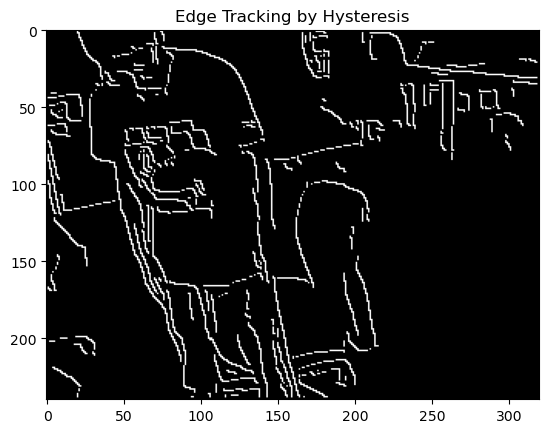

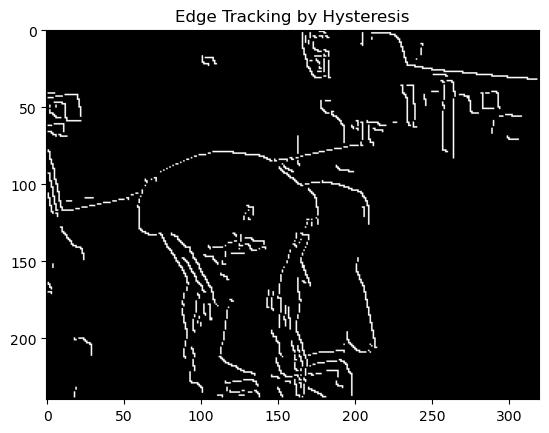

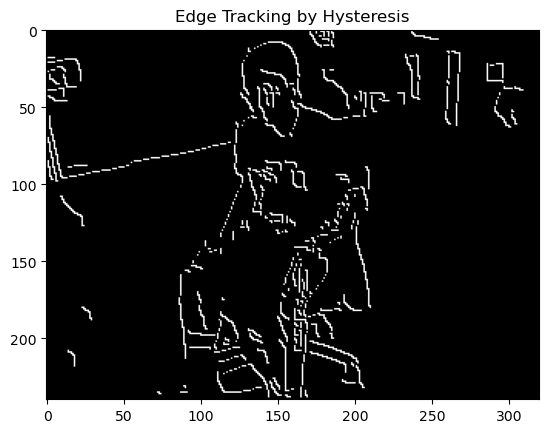

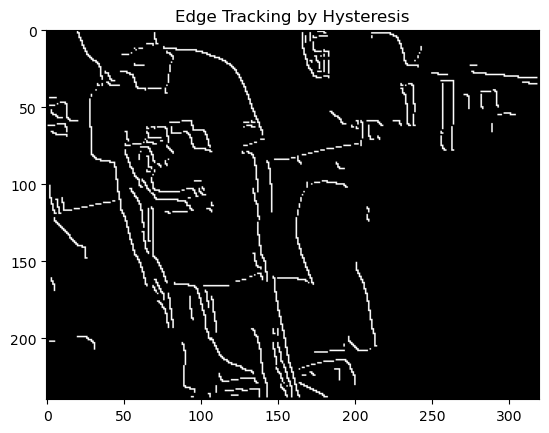

In [211]:

#############################################################################
##                                                                         ##
##           TODO: CODE BLOCK FOR STEP 4 IS HERE                           ##
#############################################################################
canny_edge_detection("HE-enchanced_frame0.jpg")
canny_edge_detection("HE-enchanced_frame1.jpg") 
canny_edge_detection("HE-enchanced_frame2.jpg")
canny_edge_detection("HE-enchanced_frame0.jpg",0,100,200) #for the last image

[**Fill in your discussion to Step 4 here**]
As expected the edges are much more distinct and noticeable as compared the original image. The edges of the human body,chair and tables are more visible. The hypothesis was correct as the output of Canny edge detection now has more pronounced edges as it can now detect the gradients better due to the increased contrast in the images. It is also important to note that since the contrast in the images has been spread evenly, the noises in the images are also more pronounced. Examples like walls and the floor detected would be considered as edge noises. Overall, the HE method has achieved what it was supposed to do and the output of the Canny edge detection is as expected.

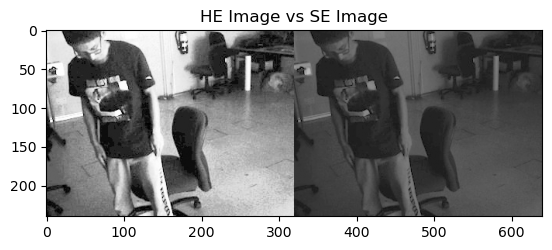

C:\Users\johna\AppData\Local\Temp\ipykernel_20124\2813359928.py:25: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(compare.flatten(), 256, [0, 256], color='gray')
C:\Users\johna\AppData\Local\Temp\ipykernel_20124\2813359928.py:28: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gamma_corrected.flatten(), 256, [0, 256], color='gray')


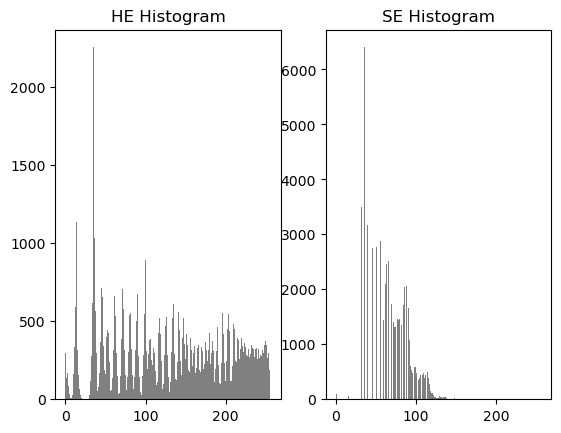

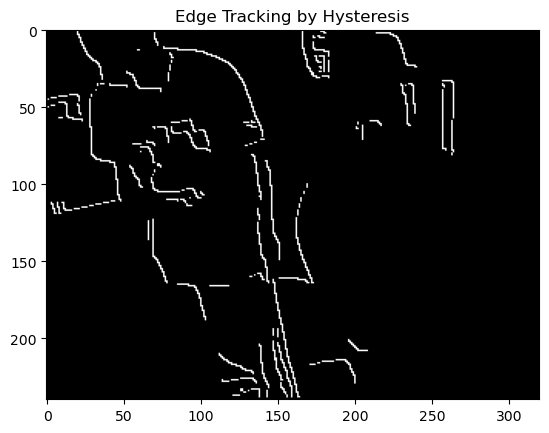

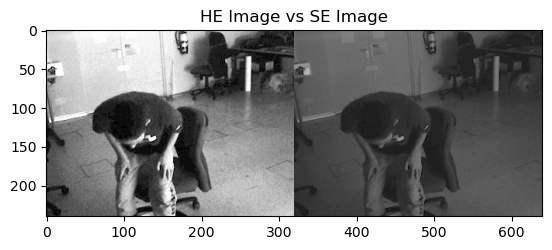

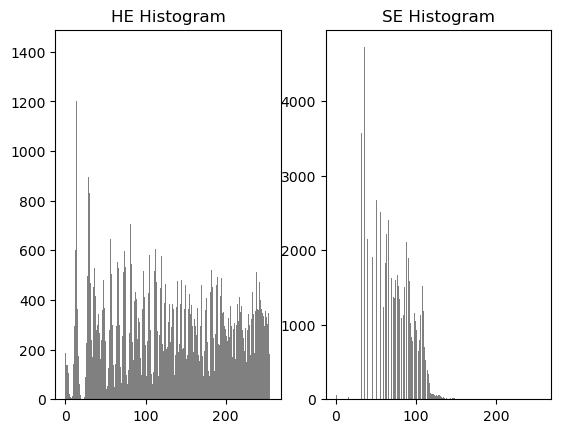

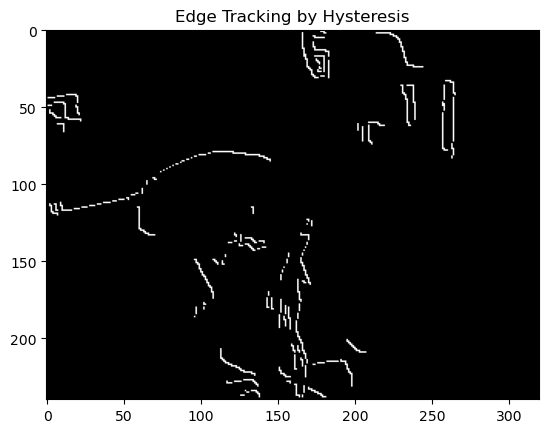

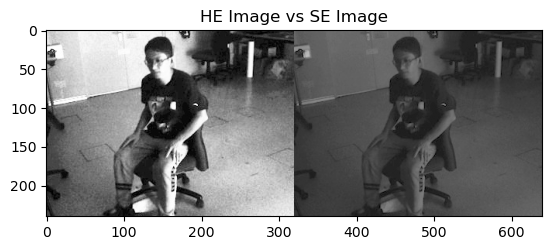

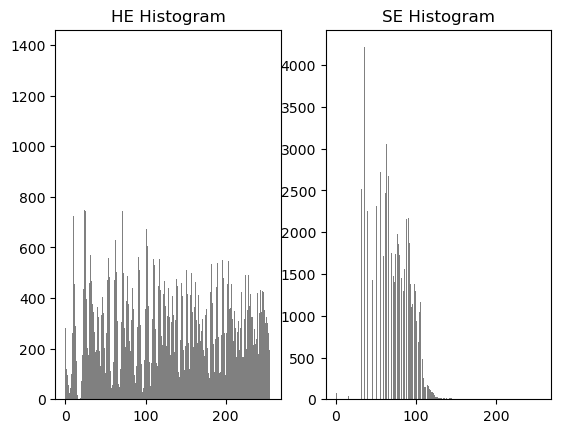

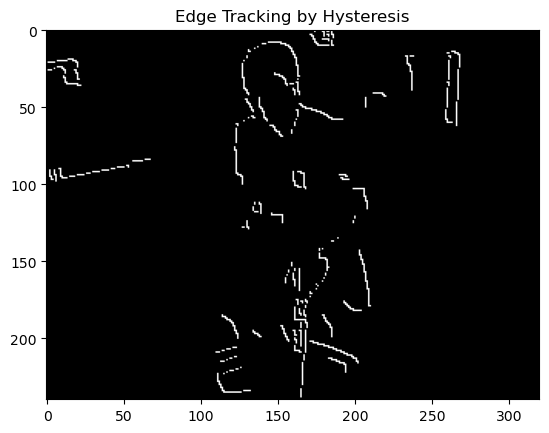

In [212]:
#############################################################################
##                                                                         ##
##           TODO: CODE BLOCK FOR STEP 5 IS HERE                           ##
#############################################################################

#For this we will use GAMMA CORRECTION as a self-enhancement technique
def self_enhancment(image_path, output_path, compare_path, checker=False):
    
    #(1) Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    compare = cv2.imread(compare_path, cv2.IMREAD_GRAYSCALE)
    #(2) Apply Gamma Correction
    gamma = 0.5 # usually 0.4 for darlk images
    gamma_corrected = np.array(255*(image / 255) ** gamma, dtype='uint8') #Normalize and apply gamma correction as power law (smaller for dark images) 
    
    
    # (6) save the image
    cv2.imwrite(output_path, gamma_corrected)
    if checker:
        res = np.hstack((compare, gamma_corrected))
        show_image("HE Image vs SE Image", res)
        #plot the histogram
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.hist(compare.flatten(), 256, [0, 256], color='gray')
        plt.title("HE Histogram")
        plt.subplot(1, 2, 2)
        plt.hist(gamma_corrected.flatten(), 256, [0, 256], color='gray')
        plt.title("SE Histogram")
        plt.show()
    if checker == False:
        show_image("SE Image", gamma_corrected)

self_enhancment("frame_0.jpg", "self-enhanced_fram1.jpg","HE-enchanced_frame0.jpg",True)
canny_edge_detection("self-enhanced_fram1.jpg",0, 40, 100)
self_enhancment("frame_1.jpg", "self-enhanced_frame1.jpg","HE-enchanced_frame1.jpg",True)
canny_edge_detection("self-enhanced_frame1.jpg",0, 40, 100)
self_enhancment("frame_2.jpg", "self-enhanced_frame2.jpg","HE-enchanced_frame2.jpg", True)
canny_edge_detection("self-enhanced_frame2.jpg",0, 40, 100)

[**Fill in your discussion to Step 5 here**]
The image enhancement method I chose was the gamma correction. The self-enhanced(SE) images less brighter than the Histogram-Enhance(HE) sampled images. Meaning that there is a lower contrast in the images and pixel values are much higher in general. However, when referencing to the histograms of SE images, it appears that the pixel values are now distributed more within the mid-range throughout the 0-255 spectrum (different from the HE samples). This may be sufficient illumination for the image as it is now much more visible. One observation would be that the lower values of the self-enhanced images seem to be more spreadout but the higher values are all cluttered together as compared for the SE images. This is expected due to the gamma correction method since the power will affect smaller values more and larger values less. An important feature would be this as result makes the noises in the image less prominent. Refereing the HE histogram, although evenly distriubuted, most of the values have similar frequencies. Consequently, this makes the images must grainier as compared to the SE images.

The edges detected in the SE images are lesser as compared to the HE images. The detected edges in SE image seems to nearly outline the edges of the guy perfectly but missing information on the chair and background. On the other hand, the detected edges in HE seems to overdetected edges(like things in the image that are not edges) such as the background but detects the edges of teh guy and chair sucessfully.

### Task 3: Harris corner detection in ultra-dark images (25%)
In this task, you will need to implement the Harris corner detection algorithm and try to improve its performance with image enhancement methods. You are to discuss how the low illumination and contrast of ultra-dark images affect the performance of Harris corner detection, and how different image enhancement methods would improve/affect the performance of Harris corner detection on ultra-dark images. You are to utilize the same images as in Task 2. You are recommended to follow the following steps (requirements):

#### Steps/Requirements for Task 2:
1. Apply your implementation of Harris corner detection onto your sampled images. You do not need to show the output of each key step of Harris corner detection. But, you must show the final output of your implementation of Harris corner detection onto your sampled images. Observe the performance of Harris corner detection on the sampled images and discuss your observation. (5%)
2. Hypothesize how will the output of Harris corner detection on your HE-enhanced sampled images be like compared to your original sampled frames. Discuss if your hypothesis is the same as what you hypothesize for the performance of Canny edge detection and why. (5%)
3. Apply your implementation of Harris corner detection onto your HE-enhanced sampled images and demonstrate the final output. Do the final outputs fit your hypothesis? If yes, rationalize your hypothsis. If not, describe and explain the differences. (5%)
4. Lastly, choose a different image enhancement method you prefer. **State** what image enhancement method has been chosen. Note that a different parameter setting is **NOT** considered as different method. Implement it with **appropriate comments** and output the results (denote as Self-enhanced sample images). Apply Harris corner detection onto the self-enhanced sample images and display the results. Discuss the difference between the Self-enhanced sample images against the HE-enhanced sample images. Further, discuss the differences between the edge detected with Harris corner detection applied over the Self-enhanced sample images and the HE-enhanced sample images. (10%)

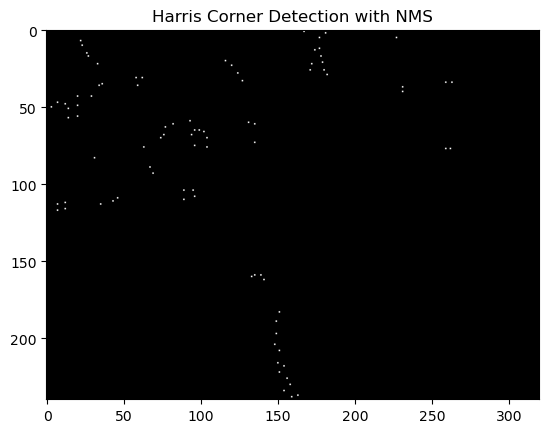

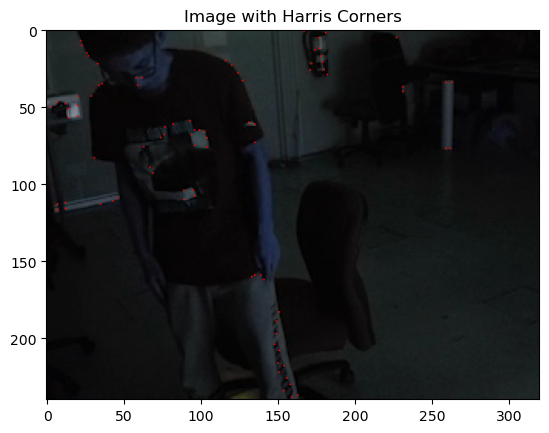

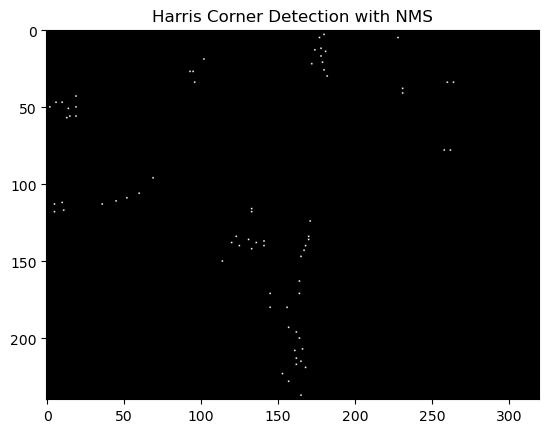

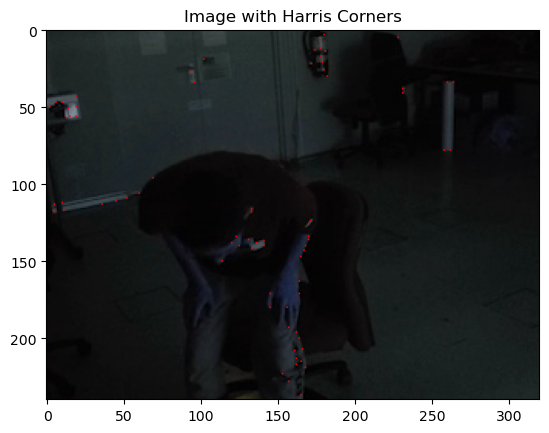

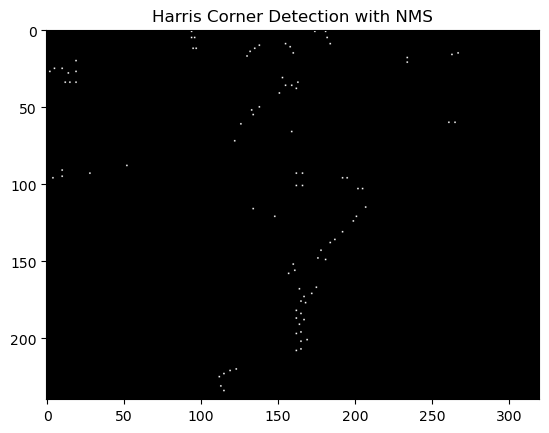

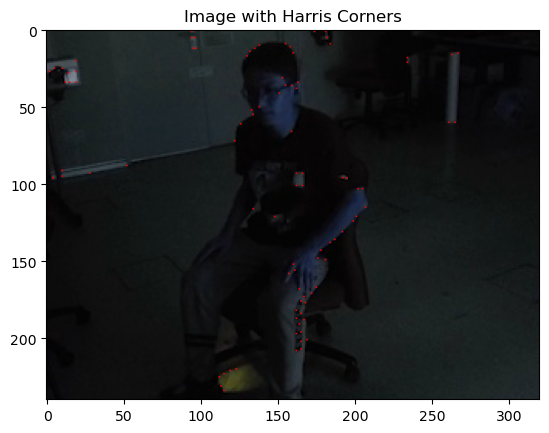

In [204]:
#############################################################################
##                                                                         ##
##           TODO: CODE BLOCK FOR STEP 1 IS HERE                           ##
#############################################################################
harris_corner_detection("frame_0.jpg")
harris_corner_detection("frame_1.jpg")
harris_corner_detection("frame_2.jpg")


**Similarly to the canny edge detector on the dark images, the harris corner edge detector is also struggling to perform well under the dimly-lit conditions in the images.Although, the more prominent onces were consisntely being detected by the harris corner detector, it is noticeable that alot of the other key corners are being missed by detector in both the images. One common example would be the edges of the chair. Similarly, the reason for this failure, is that the harris corner detector also relies heavily on the intensity gradients changes which in these scenario will be too low due to low illuminiation and low contrast.**

In [205]:
#############################################################################
##                                                                         ##
##           TODO: CODE BLOCK FOR STEP 2 IS HERE                           ##
#############################################################################


[**Fill in your discussion to Step 2 here**]
From the results of canny, I do hypothesize that the HEE images should produce more corners and edges due to the imporved contrast and illumination. This is because the Harris corner detector relies on the intensity gradients changes which will be too low in the original image. Notably, there will also be false positives since the noise will also be amplified.

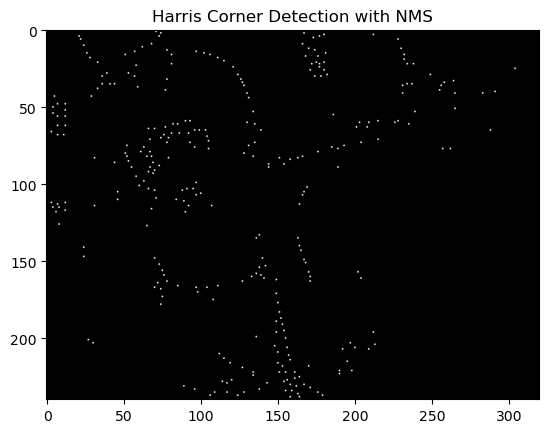

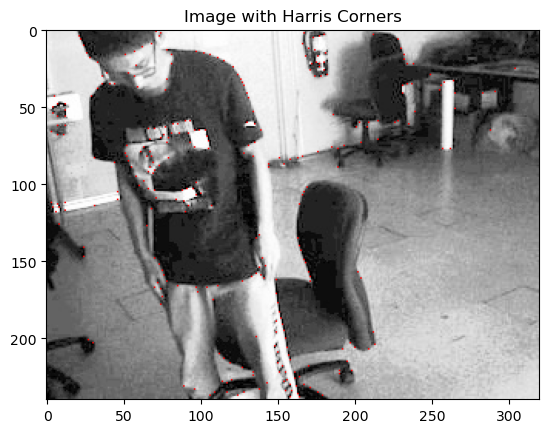

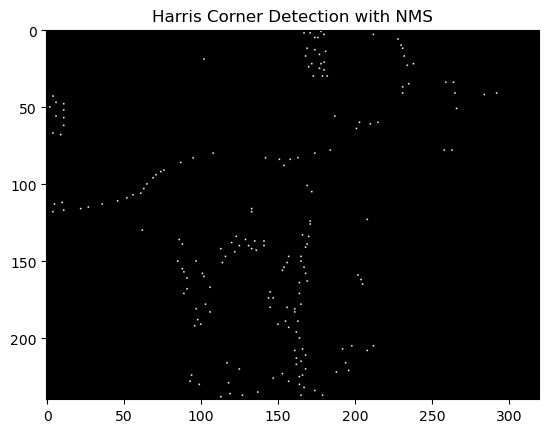

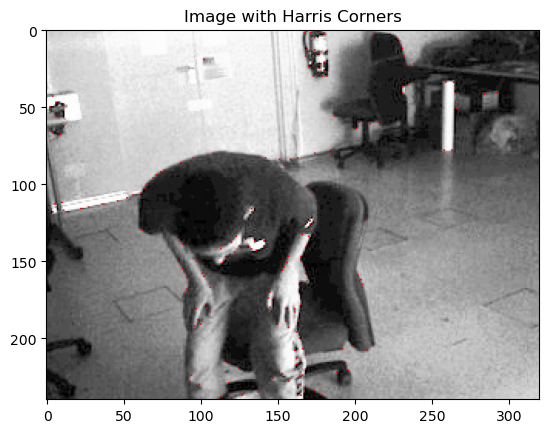

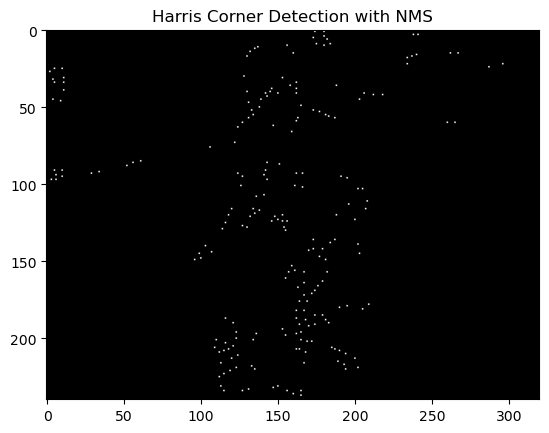

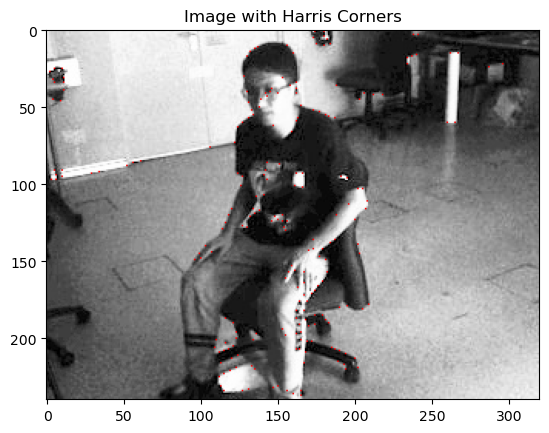

In [206]:
#############################################################################
##                                                                         ##
##           TODO: CODE BLOCK FOR STEP 3 IS HERE                           ##
#############################################################################
harris_corner_detection("HE-enchanced_frame0.jpg")
harris_corner_detection("HE-enchanced_frame1.jpg")
harris_corner_detection("HE-enchanced_frame2.jpg")

[**Fill in your discussion to Step 3 here**]
The output of the Harris corner detection on the HE-enhanced images is as expected. The corners are more pronounced and the edges are more visible. The hypothesis was correct as the output of Harris corner detection on the HE-enhanced images produced more corners and edges due to the improved contrast and illumination. However, there are also false positives detected in the images. This can be oberserved in the corners detected on the guy's arm when there should be no corners. An oberservation would the corners on the tiles on the floor is not being detected as well. This is due to the fact that the tiles are not well defined and the detector is unable to detect the corners. This is to say that the detector is not perfect and will not detect all corners.


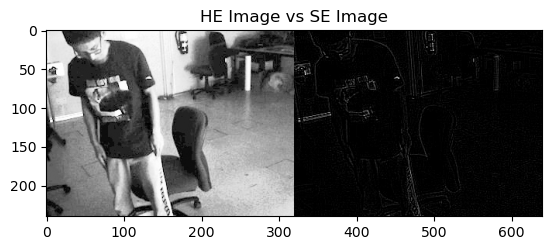

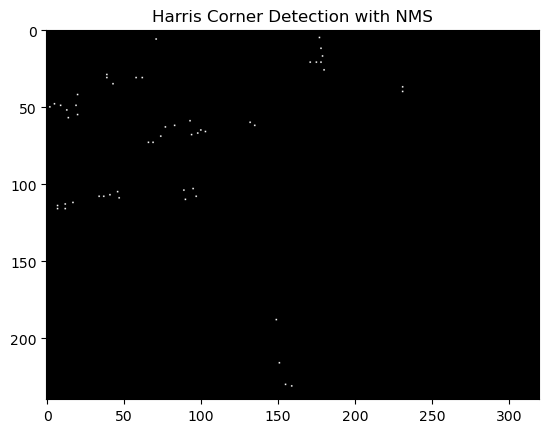

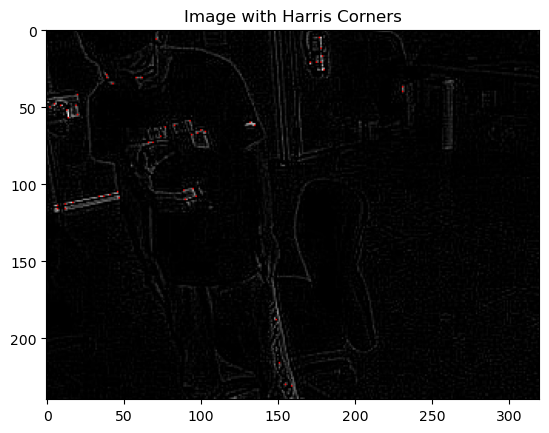

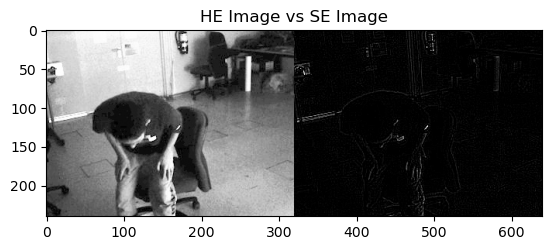

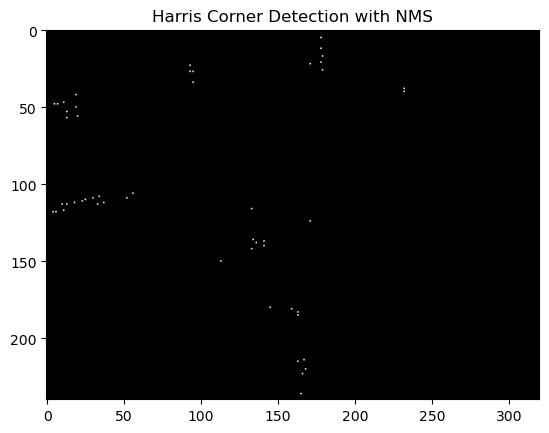

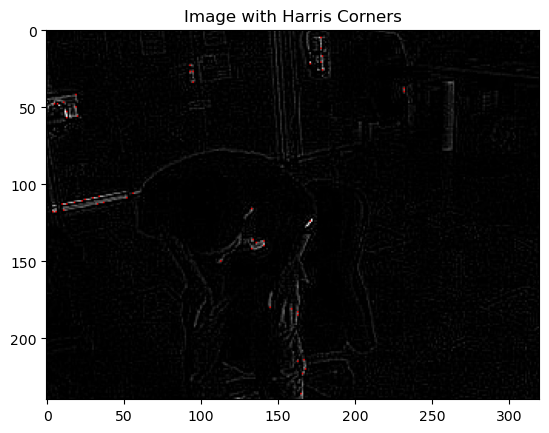

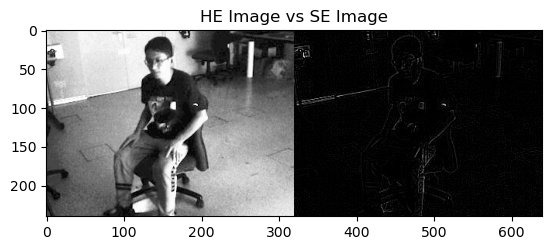

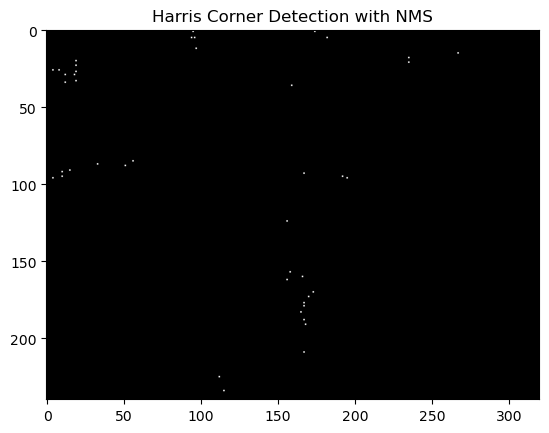

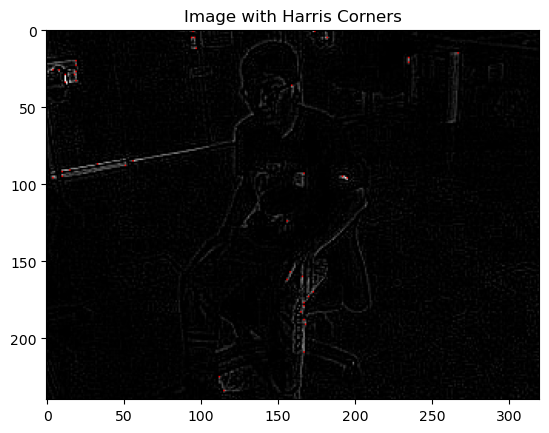

In [207]:
#############################################################################
##                                                                         ##
##           TODO: CODE BLOCK FOR STEP 4 IS HERE                           ##
#############################################################################

def other_self_enhancement(input_path,output_path,compare_path):
#for this implementation we will go with a HIGH PASS FILTER
    # (1) Load the image
    image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
    compare = cv2.imread(compare_path, cv2.IMREAD_GRAYSCALE)
    
    # (2) Apply High Pass Filter
    kernel = np.array([[-1, -1, -1], 
                       [-1,  8, -1],
                       [-1, -1, -1]]) # -1 for surrounding pixels and 8 for the center pixel because we want to enhance the edges
    high_pass = cv2.filter2D(image, -1, kernel) #-1 so the input and output image have the same depth
    
    # (3) save the image
    cv2.imwrite(output_path, high_pass)
    res = np.hstack((compare, high_pass))
    show_image("HE Image vs SE Image", res)
    
other_self_enhancement("frame_0.jpg", "other-self-enhanced_frame0.jpg","HE-enchanced_frame0.jpg")
harris_corner_detection("other-self-enhanced_frame0.jpg")
other_self_enhancement("frame_1.jpg", "other-self-enhanced_frame1.jpg","HE-enchanced_frame1.jpg")
harris_corner_detection("other-self-enhanced_frame1.jpg")
other_self_enhancement("frame_2.jpg", "other-self-enhanced_frame2.jpg","HE-enchanced_frame2.jpg")
harris_corner_detection("other-self-enhanced_frame2.jpg")


[**Fill in your discussion to Step 4 here**]
The enhancement method chosen is the high pass filter. Chose this to see an image where the edges being more defined will help in corner detection. Consequently, Other Self-Enhance (OSE) image will be alot darker with only the edges of the guy, chair and backhground being faintly defined. This would mean that the OSE image is still an ultra dark image as compared to the HEE image but with outline of the edges. As a result, the range of the OSE image will be same or even smaller than that of the original image. This could pose potential problems for the harris corner detector as the intensity gradients might be still too low despite the edeges being more defined now.

As expected, the corners detected in the OSE image are much lesser as compared to the HEE image. The corners detected in the HEE image seems to nearly outline the edges on some parts of the image which is not ideal but still detects the corners as expected. On the other hand, the detected corners in OSE seems to be underdetecting corners especially in the background. However, the OSE detected corners on the guy seems to be nearly correct.
